## Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the shared links of the datasets
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_url = 'https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

# Load the datasets directly into pandas DataFrames
customers_df = pd.read_csv(customers_url)
products_df = pd.read_csv(products_url)
transactions_df = pd.read_csv(transactions_url)

In [2]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## Schema

Diagram made using Mermaid!

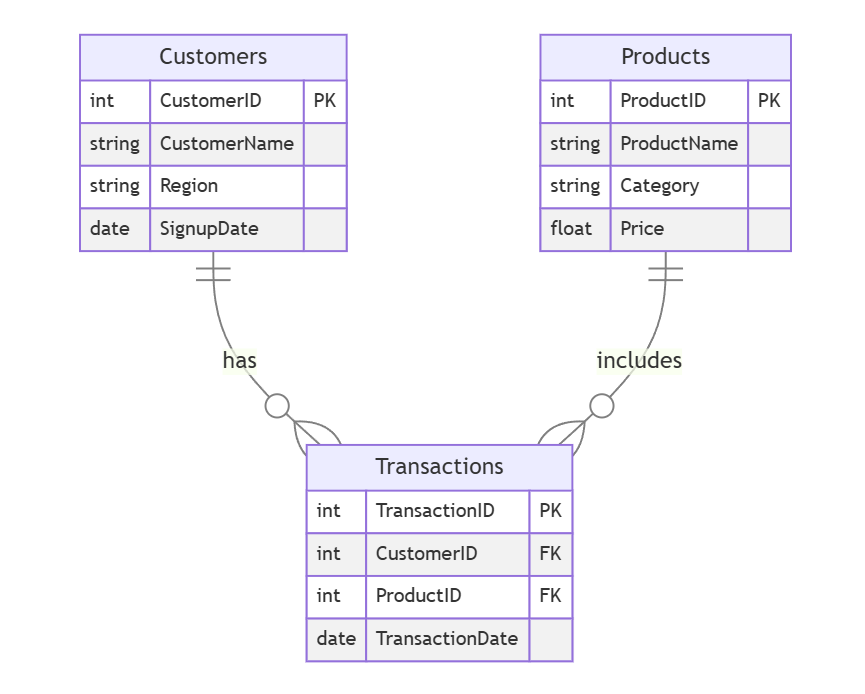

In [3]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [4]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [5]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


From the .info() function on all the tables indicated there are no null values in the dataset.. so no need to impute with any value..

In [6]:
print(f"Total categories of Products: {products_df['Category'].nunique()}")
print(f"Total number of Regions: {customers_df['Region'].nunique()}")

Total categories of Products: 4
Total number of Regions: 4


## Business Insights

### Finding the top 5 most frequently sold products in each region



1. **Global Product Trends**: Electronics like "SoundWave Headphones" and "ActiveWear Smartwatch" are universally popular, along with Books, reflecting consistent customer interest across regions.  

2. **Regional Preferences**:
- Asia prefers a mix of Clothing and Electronics
- Europe favors Home Decor and Books
- North America leans toward Electronics
- South America balances Electronics, Books, and Home Decor.

In [7]:
### Finding the top 5 sold products in each region

merged_df = transactions_df.merge(customers_df, on="CustomerID").merge(products_df, on="ProductID")
region_product_sales = merged_df.groupby(['Region', 'ProductName', 'Category']).size().reset_index(name='Sales')
sorted_sales = region_product_sales.sort_values(['Region', 'Sales'], ascending=[True, False])
top_5_products = sorted_sales.groupby('Region').head(5)

print(top_5_products)

            Region              ProductName     Category  Sales
12            Asia      BookWorld Biography        Books      9
39            Asia        HomeSense T-Shirt     Clothing      9
8             Asia    ActiveWear Smartwatch  Electronics      8
44            Asia     SoundWave Headphones  Electronics      8
4             Asia        ActiveWear Jacket     Clothing      7
67          Europe           ActiveWear Rug   Home Decor     12
106         Europe     SoundWave Headphones  Electronics     12
121         Europe         TechPro Textbook        Books      9
76          Europe       BookWorld Cookbook        Books      8
70          Europe    ActiveWear Smartwatch  Electronics      7
170  North America     SoundWave Headphones  Electronics     13
132  North America    ActiveWear Smartwatch  Electronics     10
136  North America      BookWorld Biography        Books      9
146  North America  ComfortLiving Biography        Books      8
184  North America          TechPro T-Sh

### What 5 months had the most sales?

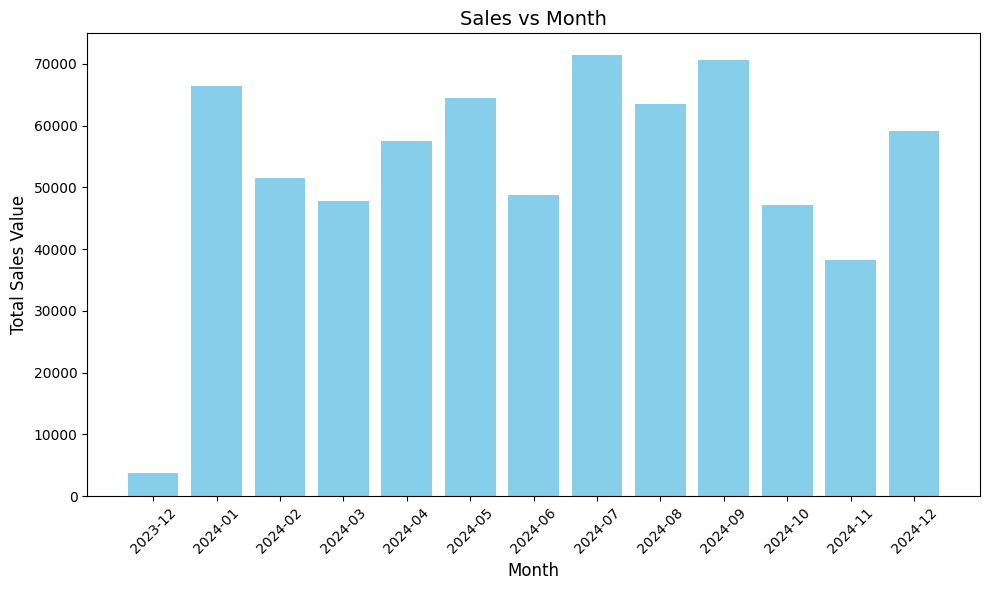

In [8]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('YearMonth')['TotalValue'].sum().reset_index()

# Plotting the sales vs month histogram
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales['YearMonth'].astype(str), monthly_sales['TotalValue'], color='skyblue')

# Adding labels and title
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales Value', fontsize=12)
plt.title('Sales vs Month', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [9]:
top_5_sales_month = monthly_sales.sort_values(['TotalValue'], ascending=False).head(5)
top_5_sales_month

,YearMonth,TotalValue
7,2024-07,71366.39
9,2024-09,70603.75
1,2024-01,66376.39
5,2024-05,64527.74
8,2024-08,63436.74


The third quarter of year 2024 had the most sales, with the top 2 monthly sales were done in the month July and September respectively.

### Most Loyal Customers

In [10]:
customer_spending = merged_df.groupby('CustomerID')['TotalValue'].sum().reset_index()
top_10_customers = customer_spending.sort_values(by='TotalValue', ascending=False).head(10)
top_10_customers_with_names = top_10_customers.merge(customers_df[['CustomerID', 'CustomerName', 'Region']], on='CustomerID')

print("Top 10 money-spending customers with names:")
print(top_10_customers_with_names)

Top 10 money-spending customers with names:
  CustomerID  TotalValue          CustomerName         Region
0      C0141    10673.87          Paul Parsons         Europe
1      C0054     8040.39          Bruce Rhodes           Asia
2      C0065     7663.70          Gerald Hines  North America
3      C0156     7634.45         William Adams  North America
4      C0082     7572.91          Aimee Taylor  South America
5      C0188     7111.32             Anna Ball  South America
6      C0059     7073.28  Mrs. Kimberly Wright  North America
7      C0028     6819.57         Jennifer Pena           Asia
8      C0099     6715.72          Rodney Eaton  South America
9      C0165     6708.10         Juan Mcdaniel  South America


## EDA

In [11]:
merged_df = customers_df.merge(transactions_df, on="CustomerID").merge(products_df, on="ProductID")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       1000 non-null   object        
 1   CustomerName     1000 non-null   object        
 2   Region           1000 non-null   object        
 3   SignupDate       1000 non-null   object        
 4   TransactionID    1000 non-null   object        
 5   ProductID        1000 non-null   object        
 6   TransactionDate  1000 non-null   datetime64[ns]
 7   Quantity         1000 non-null   int64         
 8   TotalValue       1000 non-null   float64       
 9   Price_x          1000 non-null   float64       
 10  YearMonth        1000 non-null   period[M]     
 11  ProductName      1000 non-null   object        
 12  Category         1000 non-null   object        
 13  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1

In [12]:
df = merged_df.groupby(['CustomerID', 'Region']).agg(
    TransactionValue=('TotalValue', 'sum')
).reset_index()

# Display the resulting DataFrame
print(df)

    CustomerID         Region  TransactionValue
0        C0001  South America           3354.52
1        C0002           Asia           1862.74
2        C0003  South America           2725.38
3        C0004  South America           5354.88
4        C0005           Asia           2034.24
..         ...            ...               ...
194      C0196         Europe           4982.88
195      C0197         Europe           1928.65
196      C0198         Europe            931.83
197      C0199         Europe           1979.28
198      C0200           Asia           4758.60

[199 rows x 3 columns]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        199 non-null    object 
 1   Region            199 non-null    object 
 2   TransactionValue  199 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


For Region, we will apply get_dummies() function, since these are categorical and for TransactionValue we will apply Standard Scaler

In [14]:
df = pd.get_dummies(df, columns=['Region'])
df

,CustomerID,TransactionValue,Region_Asia,Region_Europe,Region_North America,Region_South America
0,C0001,3354.52,False,False,False,True
1,C0002,1862.74,True,False,False,False
2,C0003,2725.38,False,False,False,True
3,C0004,5354.88,False,False,False,True
4,C0005,2034.24,True,False,False,False
...,...,...,...,...,...,...
194,C0196,4982.88,False,True,False,False
195,C0197,1928.65,False,True,False,False
196,C0198,931.83,False,True,False,False
197,C0199,1979.28,False,True,False,False


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# df['TransactionValue'] = scaler.fit_transform(df[['TransactionValue']])
# df

In [16]:
df.to_csv('final.csv', index=False)